Dataset Sample:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Dataset Dimension:
 (150, 4)
Reduced dataset:

        PC1       PC2  Target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


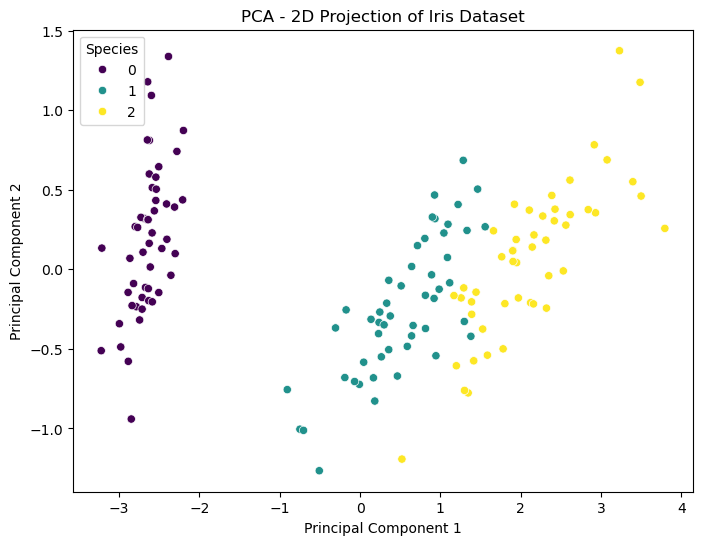

In [5]:
# Part 1: Dimensionality Reduction

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris 

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Dataset Sample:\n")
print(df.head())

print("Dataset Dimension:\n", df.shape)

pca = PCA(n_components=2)
df_pca_values = pca.fit_transform(df)

df_pca = pd.DataFrame(df_pca_values, columns=['PC1', 'PC2'])

df_pca['Target'] = iris.target

print("Reduced dataset:\n")
print(df_pca.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca, palette='viridis')
plt.title("PCA - 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()


Stock Data Sample:

              Open   Close  Volume
Date                              
2024-01-01  137.45  131.70  229312
2024-01-02  195.07  196.95  112666
2024-01-03  173.20  170.20  400804
2024-01-04  159.87  158.41  234633
2024-01-05  115.60  112.59  388998

Missing Values:

Open      0
Close     0
Volume    0
dtype: int64


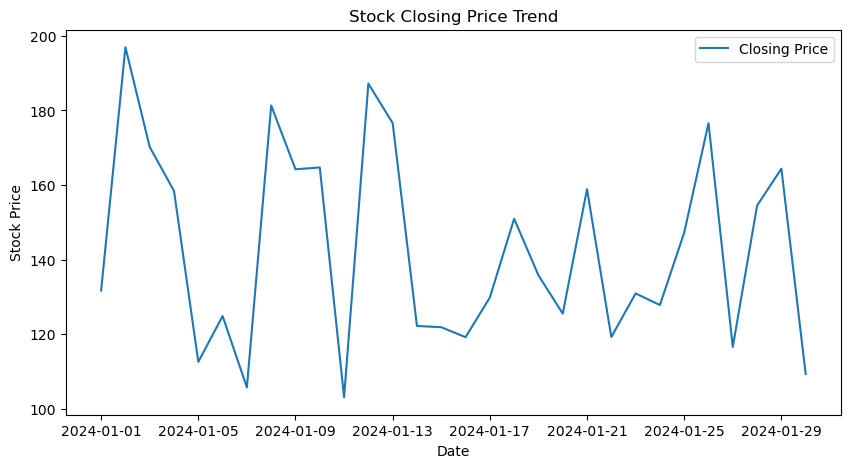


Dataset with Lag Features:
              Open   Close  Volume  Prev_Close
Date                                          
2024-01-02  195.07  196.95  112666      131.70
2024-01-03  173.20  170.20  400804      196.95
2024-01-04  159.87  158.41  234633      170.20
2024-01-05  115.60  112.59  388998      158.41
2024-01-06  115.60  124.86  426649      112.59

Forecasted Prices
2024-01-31    127.560889
2024-02-01    136.872663
2024-02-02    140.015383
2024-02-03    140.316354
2024-02-04    139.802672
2024-02-05    139.314114
2024-02-06    139.042245
2024-02-07    138.939813
2024-02-08    138.922379
2024-02-09    138.932947
Freq: D, Name: predicted_mean, dtype: float64


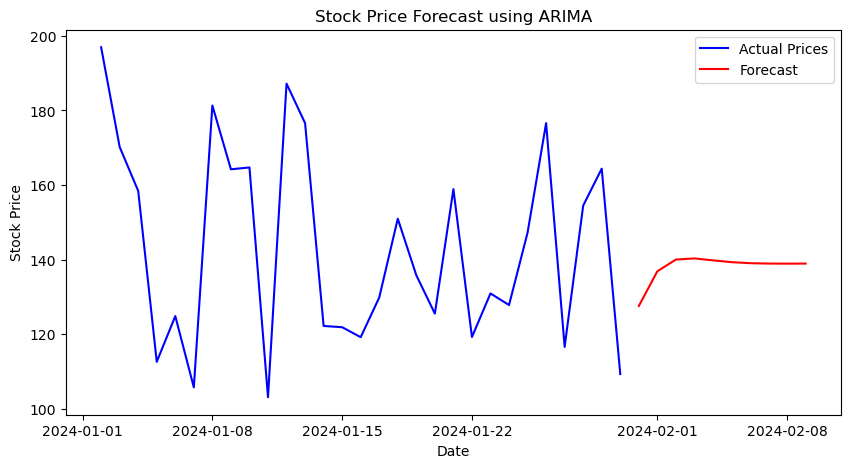

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare dataset
df = pd.read_csv("stock_prices.csv", parse_dates=['Date'], index_col='Date')
df = df.asfreq('D')
print("Stock Data Sample:\n")
print(df.head())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Plot the original closing price trend
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()

# Create lag feature
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

print("\nDataset with Lag Features:")
print(df.head())

# Fit ARIMA model
model = ARIMA(df['Close'], order=(2, 1, 2))
model_fit = model.fit()

# Forecast future prices
fprecast = model_fit.forecast(steps=10)
print("\nForecasted Prices")
print(fprecast)

# Plot actual and forecasted prices
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label="Actual Prices", color="blue")
plt.plot(forecast_dates, fprecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA")
plt.legend()
plt.show()
